In [1]:
import pandas as pd
import os

In [2]:
%pwd

'c:\\Users\\Raghu Vamsi\\Desktop\\Multi-Modal Artifact Valuation System\\research'

In [3]:
df = pd.read_csv("../data/train.csv")  # go one level up from /research
df.head()

,id,item_type,weight_grams,height_cm,width_cm,depth_cm,primary_material,secondary_material,gem_type,gem_count,...,restoration_status,authentication_status,monetary_value_gold,historical_significance,cursed_status,shine_factor,damage_resistance,set_piece,description,preservation_score
0,1,amulet,7.00,4.00,2.00,1.00,bronze,leather,emerald,3,...,cleaned,probable,5.26,major,0,0.61,0.79,0,Forged in the shadowy workshops of a legendary...,98.961998
1,2,ring,3.00,1.50,2.60,0.40,copper,none,ruby,5,...,reconstructed,questionable,7.00,minor,0,0.71,0.51,1,"Forged in the crucible of ancient warfare, thi...",8.524093
2,3,ring,3.05,1.50,2.30,0.80,brass,bone,diamond,3,...,cleaned,replica,8.62,military+commemorative,0,0.89,0.84,0,A masterfully crafted military ring emerges fr...,100.000000
3,4,crown,507.36,15.81,4.62,2.01,silver,cloth,ruby,4,...,cleaned,verified,6323.32,royal,0,0.53,0.82,0,"Forged in the heart of an ancient palace, this...",97.696450
4,5,ring,3.40,1.50,4.00,1.50,platinum,bone,ruby,1,...,restored,probable,12.10,legendary,0,0.29,0.30,0,"Emerging from the depths of an ancient cave, t...",87.634386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8000 non-null   int64  
 1   item_type                8000 non-null   object 
 2   weight_grams             8000 non-null   float64
 3   height_cm                8000 non-null   float64
 4   width_cm                 8000 non-null   float64
 5   depth_cm                 8000 non-null   float64
 6   primary_material         8000 non-null   object 
 7   secondary_material       8000 non-null   object 
 8   gem_type                 7194 non-null   object 
 9   gem_count                8000 non-null   int64  
 10  primary_color            7208 non-null   object 
 11  surface_texture          8000 non-null   object 
 12  rarity_level             8000 non-null   object 
 13  origin_culture           7214 non-null   object 
 14  creation_year           

In [5]:
df.nunique()

id                         8000
item_type                     8
weight_grams               2360
height_cm                   751
width_cm                    772
depth_cm                    653
primary_material             45
secondary_material           51
gem_type                     14
gem_count                    13
primary_color               220
surface_texture             163
rarity_level                  7
origin_culture               90
creation_year              2797
has_inscription               2
inscription_script           92
pattern_type                112
craftsmanship_level          30
magic_enchanted               2
environment_type            121
oxidation_level              10
restoration_status           32
authentication_status        31
monetary_value_gold        2943
historical_significance      89
cursed_status                 2
shine_factor                180
damage_resistance           162
set_piece                     2
description                8000
preserva

In [6]:
df.isnull().sum()

id                           0
item_type                    0
weight_grams                 0
height_cm                    0
width_cm                     0
depth_cm                     0
primary_material             0
secondary_material           0
gem_type                   806
gem_count                    0
primary_color              792
surface_texture              0
rarity_level                 0
origin_culture             786
creation_year                0
has_inscription              0
inscription_script         480
pattern_type               113
craftsmanship_level        810
magic_enchanted              0
environment_type           791
oxidation_level              0
restoration_status           0
authentication_status        0
monetary_value_gold          0
historical_significance     10
cursed_status                0
shine_factor               786
damage_resistance            0
set_piece                    0
description                  0
preservation_score           0
dtype: i

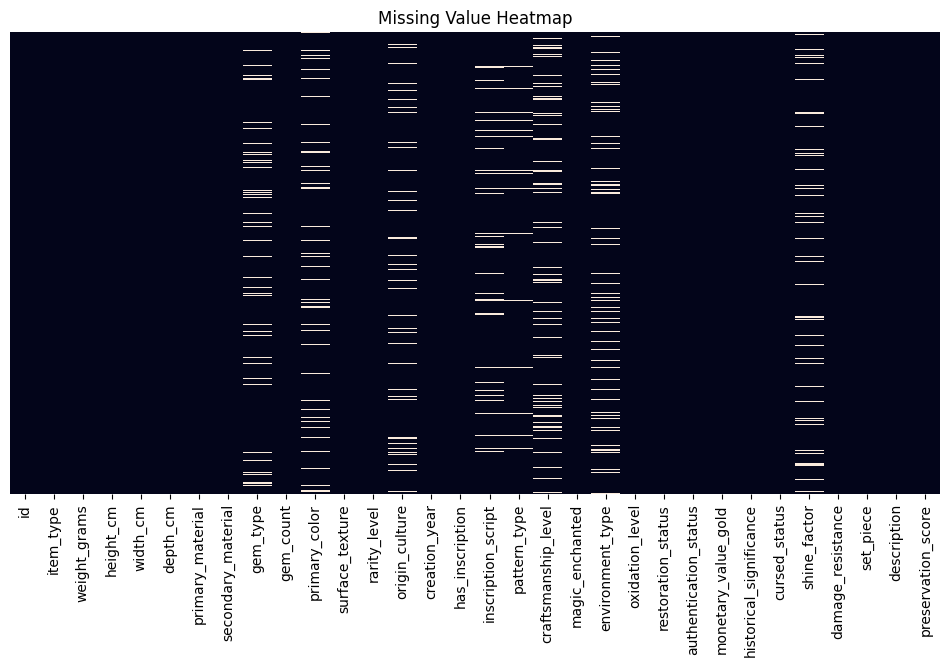

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()


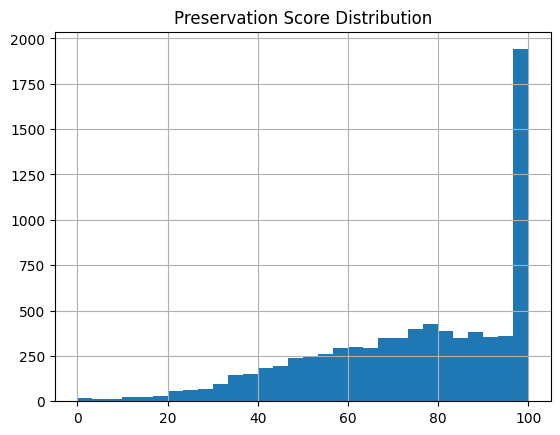

In [8]:
df["preservation_score"].hist(bins=30)
plt.title("Preservation Score Distribution")
plt.show()


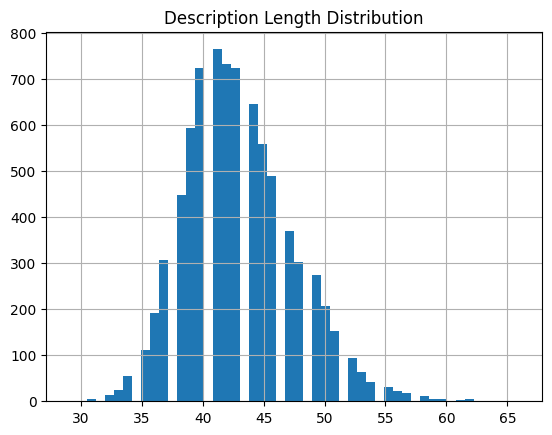

In [9]:
df["desc_length"] = df["description"].apply(lambda x: len(str(x).split()))
df["desc_length"].hist(bins=50)
plt.title("Description Length Distribution")
plt.show()

In [10]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)


craftsmanship_level        10.1250
gem_type                   10.0750
primary_color               9.9000
environment_type            9.8875
shine_factor                9.8250
origin_culture              9.8250
inscription_script          6.0000
pattern_type                1.4125
historical_significance     0.1250
cursed_status               0.0000
damage_resistance           0.0000
magic_enchanted             0.0000
set_piece                   0.0000
monetary_value_gold         0.0000
authentication_status       0.0000
description                 0.0000
restoration_status          0.0000
oxidation_level             0.0000
preservation_score          0.0000
id                          0.0000
item_type                   0.0000
has_inscription             0.0000
creation_year               0.0000
rarity_level                0.0000
surface_texture             0.0000
gem_count                   0.0000
secondary_material          0.0000
primary_material            0.0000
depth_cm            

In [11]:
df['craftsmanship_level']=df['craftsmanship_level'].fillna('Not Mentioned')
df['gem_type']=df['gem_type'].fillna('Not Mentioned')
df['primary_color']=df['primary_color'].fillna('Not Mentioned')
df['environment_type']=df['environment_type'].fillna('Not Mentioned')
df['origin_culture']=df['origin_culture'].fillna('Not Mentioned')
df['shine_factor']=df['shine_factor'].fillna(df['shine_factor'].mean())
df['inscription_script']=df['inscription_script'].fillna('Not Mentioned')
df['pattern_type']=df['pattern_type'].fillna('Not Mentioned')
df['historical_significance']=df['historical_significance'].fillna('Not Mentioned')

In [12]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)


id                         0.0
pattern_type               0.0
preservation_score         0.0
description                0.0
set_piece                  0.0
damage_resistance          0.0
shine_factor               0.0
cursed_status              0.0
historical_significance    0.0
monetary_value_gold        0.0
authentication_status      0.0
restoration_status         0.0
oxidation_level            0.0
environment_type           0.0
magic_enchanted            0.0
craftsmanship_level        0.0
inscription_script         0.0
item_type                  0.0
has_inscription            0.0
creation_year              0.0
origin_culture             0.0
rarity_level               0.0
surface_texture            0.0
primary_color              0.0
gem_count                  0.0
gem_type                   0.0
secondary_material         0.0
primary_material           0.0
depth_cm                   0.0
width_cm                   0.0
height_cm                  0.0
weight_grams               0.0
desc_len

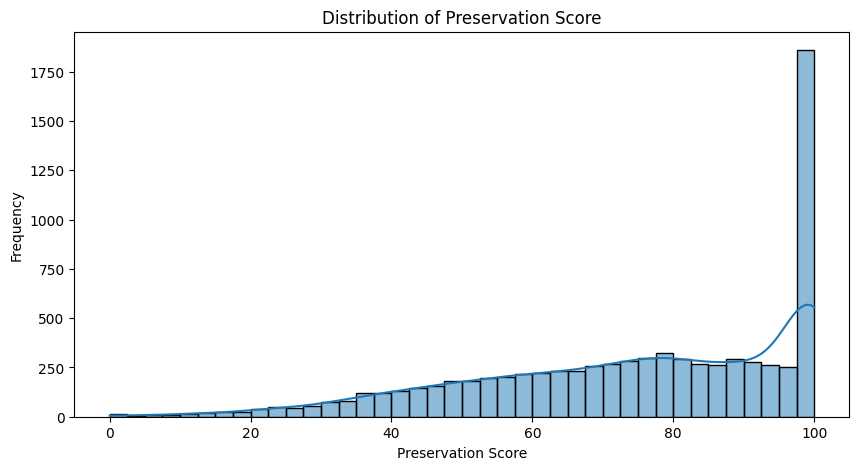

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["preservation_score"], bins=40, kde=True)
plt.title("Distribution of Preservation Score")
plt.xlabel("Preservation Score")
plt.ylabel("Frequency")
plt.show()


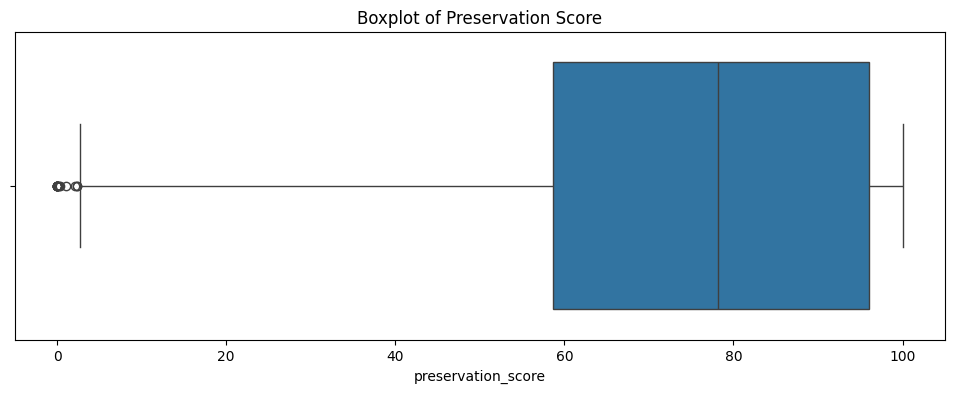

In [14]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df["preservation_score"])
plt.title("Boxplot of Preservation Score")
plt.show()


In [15]:
cat_cols = df.select_dtypes(include="object").columns.tolist()

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")




--- item_type ---
Unique values: 8

--- primary_material ---
Unique values: 45

--- secondary_material ---
Unique values: 51

--- gem_type ---
Unique values: 15

--- primary_color ---
Unique values: 221

--- surface_texture ---
Unique values: 163

--- rarity_level ---
Unique values: 7

--- origin_culture ---
Unique values: 91

--- inscription_script ---
Unique values: 93

--- pattern_type ---
Unique values: 113

--- craftsmanship_level ---
Unique values: 31

--- environment_type ---
Unique values: 122

--- oxidation_level ---
Unique values: 10

--- restoration_status ---
Unique values: 32

--- authentication_status ---
Unique values: 31

--- historical_significance ---
Unique values: 90

--- description ---
Unique values: 8000


In [16]:
high_card_cols = [
    "primary_color",
    "surface_texture",
    "origin_culture",
    "inscription_script",
    "pattern_type",
    "environment_type",
    "historical_significance"
]

for col in high_card_cols:
    print(f"\n==== {col} unique values ====")
    print(sorted(df[col].unique()))



==== primary_color unique values ====
['Not Mentioned', 'antique gold', 'antique white', 'azure blue', 'black', 'black+bronze', 'black+dark blue', 'black+gold', 'black+metallic', 'black+metallic silver', 'black+purple', 'black+silver', 'blue', 'blue+copper', 'blue+copper-green', 'blue+gold', 'blue+green', 'blue+rust', 'blue+silver', 'blue+steel-gray', 'blue+teal', 'blue-gold', 'blue-gray', 'blue-green', 'blue-green patina', 'blue-silver', 'blue-steel', 'brass-gold', 'brass-white', 'brass_green', 'bronze', 'bronze+blue', 'bronze+brown', 'bronze+gold', 'bronze+red', 'bronze+white', 'bronze-black', 'bronze-blue', 'bronze-bronze', 'bronze-brown', 'bronze-gold', 'bronze-green', 'bronze-purple', 'bronze-red', 'bronze-silver', 'bronze-white', 'bronze_gold', 'bronze_metallic', 'burnished gold', 'burnished gold+red', 'copper-gold', 'copper-red', 'crimson', 'crimson red', 'crimson+gold', 'crimson+silver', 'dark bronze', 'dark copper', 'dark_bronze', 'deep black', 'deep blue', 'deep blue-green p

In [17]:
def group_primary_color(value):
    if pd.isna(value) or value == "Not Mentioned":
        return "Not Mentioned"
    
    v = value.lower()
    if "black" in v:
        return "black"
    elif "white" in v or "ivory" in v:
        return "white"
    elif "blue" in v:
        return "blue"
    elif "red" in v or "crimson" in v or "rust" in v or "burgundy" in v:
        return "red"
    elif "green" in v or "teal" in v or "verdigris" in v or "emerald" in v:
        return "green"
    elif "gold" in v or "brass" in v or "bronze" in v or "burnished" in v:
        return "gold/bronze"
    elif "silver" in v or "platinum" in v:
        return "silver"
    elif "copper" in v:
        return "copper"
    elif "purple" in v or "lavender" in v or "violet" in v:
        return "purple"
    elif "yellow" in v or "amber" in v:
        return "yellow"
    else:
        return "other"

df["primary_color"] = df["primary_color"].apply(group_primary_color)
print(df['primary_color'].unique())

['purple' 'black' 'Not Mentioned' 'blue' 'red' 'white' 'silver'
 'gold/bronze' 'green' 'copper']


In [18]:
def group_surface_texture(value):
    if pd.isna(value):
        return "Not Mentioned"

    v = value.lower()

    if "polished" in v or "smooth" in v or "high-gloss" in v or "high-polish" in v:
        return "polished"
    elif any(x in v for x in ["rough", "pitted", "corroded", "worn", "encrusted", "heavily corroded", "heavily encrusted"]):
        return "rough"
    elif any(x in v for x in ["engraved", "etched", "scratched", "incised"]):
        return "engraved/etched"
    elif any(x in v for x in ["ornate", "intricate", "delicate", "filigree"]):
        return "ornate/intricate"
    elif any(x in v for x in ["weathered", "patinated", "aged", "tarnished"]):
        return "weathered"
    elif "+" in v or "-" in v or "_" in v:
        return "mixed"
    else:
        return "other"

df["surface_texture"] = df["surface_texture"].apply(group_surface_texture)
print(df['surface_texture'].unique())

['rough' 'weathered' 'ornate/intricate' 'polished' 'engraved/etched']


In [19]:
def group_origin_culture(value):
    if pd.isna(value) or value.lower() == "not mentioned":
        return "Not Mentioned"
    
    v = value.lower()

    if "+" in v or "_" in v:
        return "mixed"
    elif any(x in v for x in ["ancient", "proto"]):
        return "ancient"
    elif any(x in v for x in ["greek", "roman", "byzantine"]):
        return "greek/roman/byzantine"
    elif "egyptian" in v:
        return "egyptian"
    elif any(x in v for x in ["maritime", "pirate", "ocean", "naval"]):
        return "maritime/pirate"
    elif any(x in v for x in ["military", "imperial"]):
        return "military/imperial"
    elif any(x in v for x in ["tribal", "nomadic", "shamanic"]):
        return "tribal"
    elif any(x in v for x in ["religious", "monastic", "sacred", "temple"]):
        return "religious/monastic"
    elif "royal" in v:
        return "royal"
    elif any(x in v for x in ["battlefield", "warrior"]):
        return "battlefield"
    else:
        return "other"
    
df["origin_culture"] = df["origin_culture"].apply(group_origin_culture)
print(df['origin_culture'].unique())

['maritime/pirate' 'Not Mentioned' 'military/imperial' 'ancient' 'royal'
 'tribal' 'mixed' 'religious/monastic' 'other' 'greek/roman/byzantine']


In [20]:
def group_inscription_script(value):
    if pd.isna(value) or value.lower() == "not mentioned":
        return "Not Mentioned"
    
    v = value.lower()
    
    if "unknown" in v:
        return "unknown"
    elif any(x in v for x in ["ancient", "proto"]):
        return "ancient"
    elif "greek" in v:
        return "greek"
    elif "latin" in v:
        return "latin"
    elif "runic" in v:
        return "runic"
    elif "cuneiform" in v:
        return "cuneiform"
    elif "hieroglyph" in v:
        return "hieroglyphic"
    elif any(x in v for x in ["nautical", "maritime"]):
        return "nautical/maritime"
    elif "military" in v:
        return "military"
    elif any(x in v for x in ["symbolic", "pictographic", "geometric", "heraldic"]):
        return "symbolic"
    elif "tribal" in v:
        return "tribal"
    else:
        return "other"
df["inscription_script"] = df["inscription_script"].apply(group_inscription_script)
print(df['inscription_script'].unique())

['Not Mentioned' 'cuneiform' 'military' 'other' 'runic' 'latin'
 'hieroglyphic' 'ancient' 'nautical/maritime' 'symbolic' 'unknown'
 'tribal' 'greek']


In [21]:
def group_pattern_type(value):
    if pd.isna(value) or value.lower() == "not mentioned":
        return "Not Mentioned"
    
    v = value.lower()
    
    if "geometric" in v:
        return "geometric"
    elif "floral" in v:
        return "floral"
    elif any(x in v for x in ["animal", "serpent", "zoomorphic", "stylized"]):
        return "animal"
    elif any(x in v for x in ["celestial", "astronomical"]):
        return "celestial"
    elif any(x in v for x in ["maritime", "nautical", "marine"]):
        return "maritime"
    elif "tribal" in v:
        return "tribal"
    elif "abstract" in v:
        return "abstract"
    elif "minimal" in v:
        return "minimal"
    elif any(x in v for x in ["symbolic", "ritual", "heraldic"]):
        return "symbolic"
    else:
        return "other"

df["pattern_type"] = df["pattern_type"].apply(group_pattern_type)
print(df['pattern_type'].unique())

['geometric' 'animal' 'floral' 'other' 'celestial' 'abstract' 'maritime'
 'tribal' 'Not Mentioned' 'symbolic' 'minimal']


In [22]:
def group_environment_type(value):
    if pd.isna(value) or value.lower() == "not mentioned":
        return "Not Mentioned"
    
    v = value.lower()
    
    if "temple" in v or "sanctuary" in v:
        return "temple"
    elif "tomb" in v or "burial" in v:
        return "tomb"
    elif "battlefield" in v or "war" in v or "military" in v:
        return "battlefield"
    elif "palace" in v or "royal chamber" in v or "throne room" in v:
        return "palace"
    elif "cave" in v or "underground" in v:
        return "cave"
    elif "shipwreck" in v or "ocean floor" in v or "maritime museum" in v:
        return "shipwreck"
    elif "coastal" in v or "oceanic" in v or "sea" in v:
        return "coastal"
    elif "desert" in v:
        return "desert"
    elif "mountain" in v or "plateau" in v:
        return "mountain"
    elif "sacred" in v:
        return "sacred"
    else:
        return "other"

df["environment_type"] = df["environment_type"].apply(group_environment_type)
print(df['environment_type'].unique())

['palace' 'battlefield' 'desert' 'Not Mentioned' 'other' 'cave' 'temple'
 'tomb' 'coastal' 'shipwreck' 'mountain']


In [23]:
def group_historical_significance(value):
    if pd.isna(value) or value.lower() == "not mentioned":
        return "Not Mentioned"
    
    v = value.lower()
    
    if "legendary" in v:
        return "legendary"
    elif "major" in v:
        return "major"
    elif "moderate" in v or "significant" in v or "substantial" in v:
        return "moderate"
    elif "minor" in v or "minimal" in v or "low" in v:
        return "minor"
    elif "archaeological" in v:
        return "archaeological"
    elif "maritime" in v:
        return "maritime"
    elif "military" in v:
        return "military"
    elif "ritual" in v or "ceremonial" in v or "sacred" in v or "religious" in v:
        return "ritual"
    elif "royal" in v:
        return "royal"
    elif "mystical" in v:
        return "mystical"
    elif "none" in v:
        return "none"
    else:
        return "other"
df["historical_significance"] = df["historical_significance"].apply(group_historical_significance)
print(df['historical_significance'].unique())

['major' 'minor' 'military' 'royal' 'legendary' 'moderate' 'other'
 'archaeological' 'ritual' 'none' 'maritime' 'Not Mentioned' 'mystical']


In [24]:
high_card_cols = [
    "primary_color",
    "surface_texture",
    "origin_culture",
    "inscription_script",
    "pattern_type",
    "environment_type",
    "historical_significance"
]

for col in high_card_cols:
    print(f"\n==== {col} unique values ====")
    print(sorted(df[col].unique()))


==== primary_color unique values ====
['Not Mentioned', 'black', 'blue', 'copper', 'gold/bronze', 'green', 'purple', 'red', 'silver', 'white']

==== surface_texture unique values ====
['engraved/etched', 'ornate/intricate', 'polished', 'rough', 'weathered']

==== origin_culture unique values ====
['Not Mentioned', 'ancient', 'greek/roman/byzantine', 'maritime/pirate', 'military/imperial', 'mixed', 'other', 'religious/monastic', 'royal', 'tribal']

==== inscription_script unique values ====
['Not Mentioned', 'ancient', 'cuneiform', 'greek', 'hieroglyphic', 'latin', 'military', 'nautical/maritime', 'other', 'runic', 'symbolic', 'tribal', 'unknown']

==== pattern_type unique values ====
['Not Mentioned', 'abstract', 'animal', 'celestial', 'floral', 'geometric', 'maritime', 'minimal', 'other', 'symbolic', 'tribal']

==== environment_type unique values ====
['Not Mentioned', 'battlefield', 'cave', 'coastal', 'desert', 'mountain', 'other', 'palace', 'shipwreck', 'temple', 'tomb']

==== hist

In [25]:
cat_cols = df.select_dtypes(include="object").columns.tolist()

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")


--- item_type ---
Unique values: 8

--- primary_material ---
Unique values: 45

--- secondary_material ---
Unique values: 51

--- gem_type ---
Unique values: 15

--- primary_color ---
Unique values: 10

--- surface_texture ---
Unique values: 5

--- rarity_level ---
Unique values: 7

--- origin_culture ---
Unique values: 10

--- inscription_script ---
Unique values: 13

--- pattern_type ---
Unique values: 11

--- craftsmanship_level ---
Unique values: 31

--- environment_type ---
Unique values: 11

--- oxidation_level ---
Unique values: 10

--- restoration_status ---
Unique values: 32

--- authentication_status ---
Unique values: 31

--- historical_significance ---
Unique values: 13

--- description ---
Unique values: 8000


In [26]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train, y_test = train_test_split(
    df.drop(columns=["preservation_score"]),
    df["preservation_score"],
    test_size=0.2,
    random_state=42
)

In [27]:
pip install --upgrade gensim


Note: you may need to restart the kernel to use updated packages.


In [28]:
from gensim.models import Word2Vec

train_sentences = X_train_df["description"].apply(lambda x: x.lower().split()).tolist()

w2v_model = Word2Vec(
    sentences=train_sentences,
    vector_size=50,
    window=5,
    min_count=1,
    workers=4,
    seed=42
)


In [29]:
import numpy as np

def get_avg_w2v(sentence, model, vector_size):
    words = sentence.lower().split()
    valid_words = [w for w in words if w in model.wv.key_to_index]
    if not valid_words:
        return np.zeros(vector_size)
    return np.mean(model.wv[valid_words], axis=0)

# Train embeddings
w2v_train = np.vstack(
    X_train_df["description"].apply(lambda x: get_avg_w2v(x, w2v_model, 50)).values
)

# Test embeddings
w2v_test = np.vstack(
    X_test_df["description"].apply(lambda x: get_avg_w2v(x, w2v_model, 50)).values
)

# Confirm shapes
print(w2v_train.shape)
print(w2v_test.shape)


(6400, 50)
(1600, 50)


In [30]:
X_train_meta = X_train_df.drop(columns=["id", "description"])
X_test_meta = X_test_df.drop(columns=["id", "description"])

num_cols = X_train_meta.select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_cols = X_train_meta.select_dtypes(include=["object"]).columns.tolist()



In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
])

# Fit on train only
preprocessor.fit(X_train_meta)

# Transform both
X_train_meta_transformed = preprocessor.transform(X_train_meta)
X_test_meta_transformed = preprocessor.transform(X_test_meta)

print(X_train_meta_transformed.shape)
print(X_test_meta_transformed.shape)


(6400, 307)
(1600, 307)


In [32]:
import numpy as np

# Concatenate metadata and embeddings
X_train_goal1 = np.hstack([X_train_meta_transformed, w2v_train])
X_test_goal1 = np.hstack([X_test_meta_transformed, w2v_test])

print("Goal 1 final feature shape (train):", X_train_goal1.shape)
print("Goal 1 final feature shape (test):", X_test_goal1.shape)

# For Goal 2
X_train_goal2 = w2v_train
X_test_goal2 = w2v_test

print("Goal 2 feature shape (train):", X_train_goal2.shape)
print("Goal 2 feature shape (test):", X_test_goal2.shape)


Goal 1 final feature shape (train): (6400, 357)
Goal 1 final feature shape (test): (1600, 357)
Goal 2 feature shape (train): (6400, 50)
Goal 2 feature shape (test): (1600, 50)


In [33]:
X_train_goal1[0]

array([ 0.20624416,  0.34187344,  1.40425706,  2.91530766, -1.54348408,
       -0.79331529,  0.92586488,  1.94966672,  0.06109873, -0.42803407,
       -0.00587526, -0.11660086, -0.49560152, -0.89894943,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [34]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    "ridge": Ridge(),
    "lasso": Lasso(max_iter=5000),
    "elasticnet": ElasticNet(max_iter=5000),
    "decision_tree": DecisionTreeRegressor(),
    "random_forest": RandomForestRegressor(),
    "gradient_boosting": GradientBoostingRegressor(),
    "ada_boost": AdaBoostRegressor(),
    "svr": SVR(),
    "knn": KNeighborsRegressor(),
    "xgboost": XGBRegressor(),
    "lightgbm": LGBMRegressor()
}


In [35]:
param_grids = {
    "ridge": {
        "alpha": [0.1, 1.0, 10.0, 100.0]
    },
    "lasso": {
        "alpha": [0.001, 0.01, 0.1, 1.0, 10.0]
    },
    "elasticnet": {
        "alpha": [0.01, 0.1, 1.0],
        "l1_ratio": [0.2, 0.5, 0.8]
    },
    "decision_tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "random_forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "gradient_boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5]
    },
    "ada_boost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0]
    },
    "svr": {
        "C": [0.1, 1.0, 10.0],
        "epsilon": [0.01, 0.1, 0.2],
        "kernel": ["linear", "rbf"]
    },
    "knn": {
        "n_neighbors": [3, 5, 10],
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },
    "xgboost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "lightgbm": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [-1, 5, 10]
    }
}


In [36]:
from sklearn.model_selection import GridSearchCV
import joblib
import os

# Create research folder if not exists
os.makedirs("research", exist_ok=True)

best_models_goal1 = {}
best_models_goal2 = {}

print("🔹 Training models for GOAL 1: All Features")
for name, model in models.items():
    print(f"\nTraining {name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=-1
    )
    grid.fit(X_train_goal1, y_train)
    best_models_goal1[name] = grid.best_estimator_
    print(f"✅ Best params for {name}: {grid.best_params_}")

    # Save the model
    joblib.dump(grid.best_estimator_, f"research/{name}_goal1_model.pkl")

print("\n🔹 Training models for GOAL 2: Description Only")
for name, model in models.items():
    print(f"\nTraining {name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=-1
    )
    grid.fit(X_train_goal2, y_train)
    best_models_goal2[name] = grid.best_estimator_
    print(f"✅ Best params for {name}: {grid.best_params_}")

    # Save the model
    joblib.dump(grid.best_estimator_, f"research/{name}_goal2_model.pkl")


🔹 Training models for GOAL 1: All Features

Training ridge...
✅ Best params for ridge: {'alpha': 1.0}

Training lasso...
✅ Best params for lasso: {'alpha': 0.01}

Training elasticnet...
✅ Best params for elasticnet: {'alpha': 0.01, 'l1_ratio': 0.8}

Training decision_tree...
✅ Best params for decision_tree: {'max_depth': 5, 'min_samples_split': 10}

Training random_forest...
✅ Best params for random_forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Training gradient_boosting...
✅ Best params for gradient_boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Training ada_boost...
✅ Best params for ada_boost: {'learning_rate': 1.0, 'n_estimators': 200}

Training svr...
✅ Best params for svr: {'C': 10.0, 'epsilon': 0.2, 'kernel': 'linear'}

Training knn...
✅ Best params for knn: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Training xgboost...
✅ Best params for xgboost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

Training light

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

results_goal1 = {}
results_goal2 = {}

# Evaluate Goal 1
print("\n🔹 Evaluation for GOAL 1 (All Features)")
for name, model in best_models_goal1.items():
    y_pred = model.predict(X_test_goal1)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    results_goal1[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}
    print(f"\nModel: {name}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test R2: {r2:.4f}")

# Evaluate Goal 2
print("\n🔹 Evaluation for GOAL 2 (Description Only)")
for name, model in best_models_goal2.items():
    y_pred = model.predict(X_test_goal2)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    results_goal2[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}
    print(f"\nModel: {name}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test R2: {r2:.4f}")



🔹 Evaluation for GOAL 1 (All Features)

Model: ridge
Test MSE: 155.8159
Test RMSE: 12.4826
Test R2: 0.7088

Model: lasso
Test MSE: 153.2544
Test RMSE: 12.3796
Test R2: 0.7135

Model: elasticnet
Test MSE: 155.0161
Test RMSE: 12.4505
Test R2: 0.7103

Model: decision_tree
Test MSE: 276.6860
Test RMSE: 16.6339
Test R2: 0.4828

Model: random_forest
Test MSE: 209.3469
Test RMSE: 14.4688
Test R2: 0.6087

Model: gradient_boosting
Test MSE: 158.9969
Test RMSE: 12.6094
Test R2: 0.7028

Model: ada_boost
Test MSE: 294.0735
Test RMSE: 17.1486
Test R2: 0.4503

Model: svr
Test MSE: 158.5007
Test RMSE: 12.5897
Test R2: 0.7037

Model: knn
Test MSE: 357.2049
Test RMSE: 18.8999
Test R2: 0.3323

Model: xgboost
Test MSE: 158.1065
Test RMSE: 12.5740
Test R2: 0.7045

Model: lightgbm
Test MSE: 159.4480
Test RMSE: 12.6273
Test R2: 0.7020

🔹 Evaluation for GOAL 2 (Description Only)

Model: ridge
Test MSE: 349.5182
Test RMSE: 18.6954
Test R2: 0.3467

Model: lasso
Test MSE: 349.5745
Test RMSE: 18.6969
Test R2: 0

c:\Users\Raghu Vamsi\anaconda3\envs\rgv-env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



Model: ada_boost
Test MSE: 414.7558
Test RMSE: 20.3656
Test R2: 0.2248

Model: svr
Test MSE: 354.7100
Test RMSE: 18.8337
Test R2: 0.3370

Model: knn
Test MSE: 376.6258
Test RMSE: 19.4068
Test R2: 0.2960

Model: xgboost
Test MSE: 348.5189
Test RMSE: 18.6687
Test R2: 0.3486

Model: lightgbm
Test MSE: 345.8910
Test RMSE: 18.5981
Test R2: 0.3535


c:\Users\Raghu Vamsi\anaconda3\envs\rgv-env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [38]:
import joblib
import os

# Create folder if not exists
os.makedirs("research", exist_ok=True)

# Save preprocessor
joblib.dump(preprocessor, "research/preprocessor_goal1.pkl")

# Save Word2Vec model separately (gensim uses its own save)
w2v_model.save("research/word2vec.model")

# Save all best models (Goal 1)
for name, model in best_models_goal1.items():
    joblib.dump(model, f"research/best_model_goal1_{name}.pkl")

# Save all best models (Goal 2)
for name, model in best_models_goal2.items():
    joblib.dump(model, f"research/best_model_goal2_{name}.pkl")

print("✅ All models and preprocessing objects saved successfully!")


✅ All models and preprocessing objects saved successfully!


In [ ]:
import pandas as pd
import numpy as np
import joblib
from gensim.models import Word2Vec

# 1. Load data
eval_df = pd.read_csv("../data/evaluation.csv")

# 2. Load preprocessing objects
preprocessor = joblib.load("research/preprocessor_goal1.pkl")
w2v_model = Word2Vec.load("research/word2vec.model")

# 3. Split into metadata and description
eval_meta = eval_df.drop(columns=["id", "description"])
eval_desc = eval_df["description"]

# 4. Preprocess metadata
eval_meta_transformed = preprocessor.transform(eval_meta)

# 5. Create Word2Vec features
def get_avg_w2v(sentence, model, vector_size=50):
    words = sentence.lower().split()
    valid_words = [w for w in words if w in model.wv.key_to_index]
    if not valid_words:
        return np.zeros(vector_size)
    return np.mean(model.wv[valid_words], axis=0)

w2v_eval = np.vstack(eval_desc.apply(lambda x: get_avg_w2v(x, w2v_model)).values)

# 6. Final eval feature matrix
X_eval_final = np.hstack([eval_meta_transformed, w2v_eval])
print("Final Eval Shape:", X_eval_final.shape)

# 7. Load one of the best models (change name to test different ones)
model = joblib.load("research/best_model_goal1_random_forest.pkl")

# 8. Predict
preds = model.predict(X_eval_final)

# 9. Save predictions
eval_df["predicted_preservation_score"] = preds
eval_df.to_csv("predictions_goal1.csv", index=False)

print("✅ Prediction complete. Saved to predictions_goal1.csv")


In [ ]:
# 1. Use same eval_df already loaded above

# 2. Generate description-based features
X_eval_text_only = np.vstack(
    eval_df["description"].apply(lambda x: get_avg_w2v(x, w2v_model)).values
)

# 3. Load best model (based on description only)
model = joblib.load("research/best_model_goal2_random_forest.pkl")  # change name as needed

# 4. Predict
preds_desc_only = model.predict(X_eval_text_only)

# 5. Save
eval_df["predicted_preservation_score_desc_only"] = preds_desc_only
eval_df.to_csv("predictions_goal2.csv", index=False)

print("✅ Prediction complete (description-only). Saved to predictions_goal2.csv")
